# Capítulo 7: Números Fuzzy

>## Modelagem e Simulação de Sistemas Usando Lógica Fuzzy com Python: Teoria e Prática
>### Aurtor: Jorge Zavaleta

In [1]:
# importanção das bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzzy

In [2]:
## Universo de Discurso
X = np.arange(0,10,0.2)
print('Universo de Discurso:')
print(X)

Universo de Discurso:
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8 8.  8.2 8.4 8.6 8.8 9.  9.2 9.4 9.6 9.8]


## Conjunto Fuzzy Convexo

In [3]:
# Conjunto convexo e não normal
def convexo(x,a,m,n,b):
    out = []
    val=[]
    for i in x:
        if (a < i) and (i < m):
            v1 = (i-a)/(m-a)
            val.append(v1)
        elif (m <= i) and (i <= n):
            v2 = 0.8
            val.append(v2)
        elif (n < i) and (i < b):
            v3 = (b-i)/(b-n)
            val.append(v3)
        else:
            v4 = 0
            val.append(v4)
        
    out = np.array(val)
    return out

In [4]:
# conjunto convexo nao normal
cx = convexo(X,1,2,3,4)
print('conjunto convexo não normal:')
print(cx)

conjunto convexo não normal:
[0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.6
 0.4 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [5]:
# gerando um conjunto normal
A = fuzzy.trimf(X,[5,7,9])
print('Conjunto Normal:')
print(A)

Conjunto Normal:
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.
 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0. ]


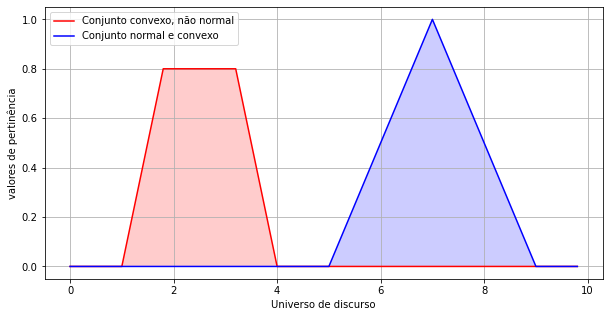

In [6]:
fig, graf = plt.subplots(nrows=1, figsize=(10, 5))
graf.plot(X,cx,'r', linewidth=1.5, label='Conjunto convexo, não normal')
graf.fill(X,cx,'r', alpha=0.2)
graf.plot(X,A,'b', linewidth=1.5, label='Conjunto normal e convexo')
graf.fill(X,A,'b', alpha=0.2)
graf.grid()
graf.legend()
plt.xlabel('Universo de discurso')
plt.ylabel('valores de pertinência')
plt.show()
#fig.savefig('convexo_e_normal.png')

## Conjuntos Fuzzy não Convexos e normais

In [7]:
# conjunto normal e não convexo
def normal_no_convexo(muA,muB):
    out = np.fmax(muA,muB)
    return out

In [8]:
# conjunto convexo nao normal
B1 = convexo(X,1,2,3,4)
B1

array([0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [9]:
# gerando o número fuzzy tringular
B2 = fuzzy.trimf(X,[3,7,9])
print('B=',B2)

B= [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6
 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   0.9  0.8  0.7  0.6  0.5  0.4
 0.3  0.2  0.1  0.   0.   0.   0.   0.  ]


In [10]:
n_no_c = normal_no_convexo(B1,B2)
print(n_no_c)

[0.   0.   0.   0.   0.   0.   0.2  0.4  0.6  0.8  0.8  0.8  0.8  0.8
 0.8  0.8  0.8  0.6  0.4  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6
 0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   0.9  0.8  0.7  0.6  0.5  0.4
 0.3  0.2  0.1  0.   0.   0.   0.   0.  ]


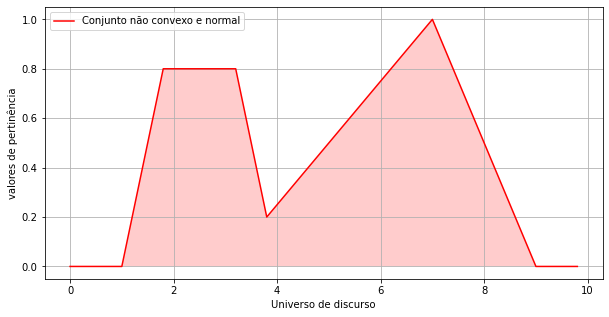

In [11]:
fig, g = plt.subplots(nrows=1, figsize=(10, 5))
g.plot(X,n_no_c,'r', linewidth=1.5, label='Conjunto não convexo e normal')
g.fill(X,n_no_c,'r', alpha=0.2)
g.grid()
g.legend()
plt.xlabel('Universo de discurso')
plt.ylabel('valores de pertinência')
plt.show()
#fig.savefig('no_convexo_normal.png')

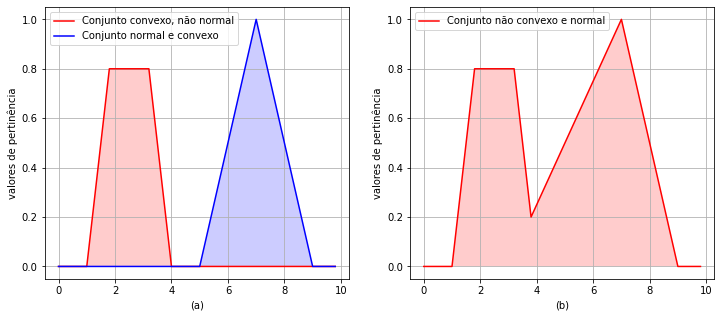

In [12]:
# unindo os dois graficos
fig, nc = plt.subplots(nrows=1, ncols = 2, figsize=(12, 5))
# grafico coluna 1
nc[0].plot(X,cx,'r', linewidth=1.5, label='Conjunto convexo, não normal')
nc[0].fill(X,cx,'r', alpha=0.2)
nc[0].plot(X,A,'b', linewidth=1.5, label='Conjunto normal e convexo')
nc[0].fill(X,A,'b', alpha=0.2)
nc[0].legend()
nc[0].grid()
nc[0].set_xlabel('(a)')
nc[0].set_ylabel('valores de pertinência')
# grafico coluna 2
nc[1].plot(X,n_no_c,'r', linewidth=1.5, label='Conjunto não convexo e normal')
nc[1].fill(X,n_no_c,'r', alpha=0.2)
nc[1].legend()
nc[1].grid()
nc[1].set_xlabel('(b)')
nc[1].set_ylabel('valores de pertinência')
plt.show()
#fig.savefig('no_convexo_normal.png') # ativar só para gravar figura

## Representação de Números Fuzzy

### Número Fuzzy 4 - MF triangular

In [13]:
# gerando o universo de discurso
X1 = np.arange(0,8,0.2)
print('X:',X1)

X: [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2 6.4 6.6 6.8 7.
 7.2 7.4 7.6 7.8]


In [14]:
# gerando o número fuzzy 4 usando MF triangular
A4 = fuzzy.trimf(X1,[3,4,5])
print('Número fuzzy 4:')
print('4 =',A4)

Número fuzzy 4:
4 = [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.4
 0.6 0.8 1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0. ]


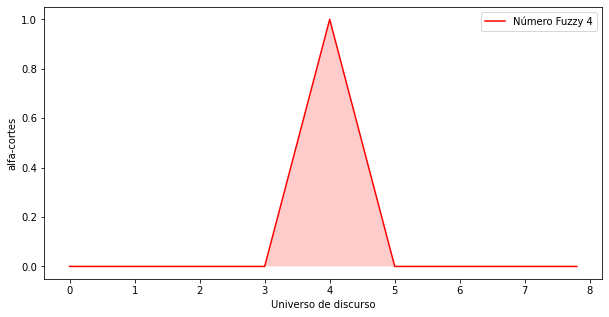

In [15]:
fig, n4 = plt.subplots(nrows=1, figsize=(10, 5))
n4.plot(X1,A4,'r', linewidth=1.5, label='Número Fuzzy 4')
n4.fill(X1,A4,'r', alpha=0.2)
#n4.grid()
n4.legend()
n4.set_xlabel('Universo de discurso')
n4.set_ylabel('alfa-cortes')
plt.show()
#fig.savefig('convexo_e_normal.png')

In [16]:
# gerando o número fuzzy 4 usando MF Bell
Bel4 = fuzzy.gbellmf(X1,1,2.5,4)
print('Número fuzzy 4:')
print('4 =',Bel4)

Número fuzzy 4:
4 = [9.75609756e-04 1.26047505e-03 1.65108657e-03 2.19609243e-03
 2.97137685e-03 4.09836066e-03 5.77688470e-03 8.34628677e-03
 1.24029100e-02 1.90344508e-02 3.03030303e-02 5.02621675e-02
 8.70643301e-02 1.56783062e-01 2.86670948e-01 5.00000000e-01
 7.53193541e-01 9.27850356e-01 9.89863795e-01 9.99680102e-01
 1.00000000e+00 9.99680102e-01 9.89863795e-01 9.27850356e-01
 7.53193541e-01 5.00000000e-01 2.86670948e-01 1.56783062e-01
 8.70643301e-02 5.02621675e-02 3.03030303e-02 1.90344508e-02
 1.24029100e-02 8.34628677e-03 5.77688470e-03 4.09836066e-03
 2.97137685e-03 2.19609243e-03 1.65108657e-03 1.26047505e-03]


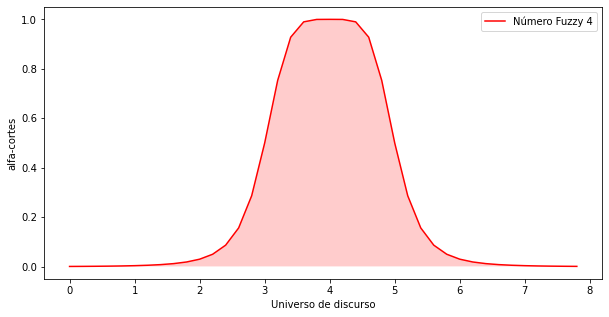

In [17]:
fig, b4 = plt.subplots(nrows=1, figsize=(10, 5))
b4.plot(X1,Bel4,'r', linewidth=1.5, label='Número Fuzzy 4')
b4.fill(X1,Bel4,'r', alpha=0.2)
#n4.grid()
b4.legend()
b4.set_xlabel('Universo de discurso')
b4.set_ylabel('alfa-cortes')
plt.show()
#fig.savefig('convexo_e_normal.png')

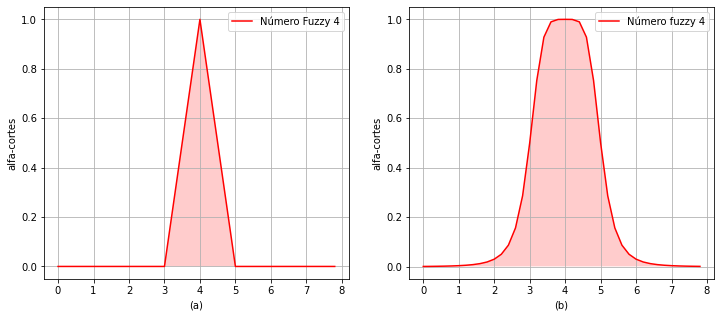

In [18]:
# unindo os dois graficos
fig, nu4 = plt.subplots(nrows=1, ncols = 2, figsize=(12, 5))
# grafico coluna 1
nu4[0].plot(X1,A4,'r', linewidth=1.5, label='Número Fuzzy 4')
nu4[0].fill(X1,A4,'r', alpha=0.2)
nu4[0].legend()
nu4[0].grid()
nu4[0].set_xlabel('(a)')
nu4[0].set_ylabel('alfa-cortes')
# grafico coluna 2
nu4[1].plot(X1,Bel4,'r', linewidth=1.5, label='Número fuzzy 4')
nu4[1].fill(X1,Bel4,'r', alpha=0.2)
nu4[1].legend()
nu4[1].grid()
nu4[1].set_xlabel('(b)')
nu4[1].set_ylabel('alfa-cortes')
plt.show()
#fig.savefig('numero_fuzzy_4.png') # ativar só para gravar figura

## Número Fuzzy Triangular - Intervalos

In [19]:
# gerando o número fuzzy 4 usando MF triangular
X2 = np.arange(0,10,0.1)
Trim4 = fuzzy.trimf(X2,[2,4,6])
print('Número fuzzy 4:')
print('T =',Trim4)

Número fuzzy 4:
T = [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35
 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   0.95
 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3  0.25
 0.2  0.15 0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


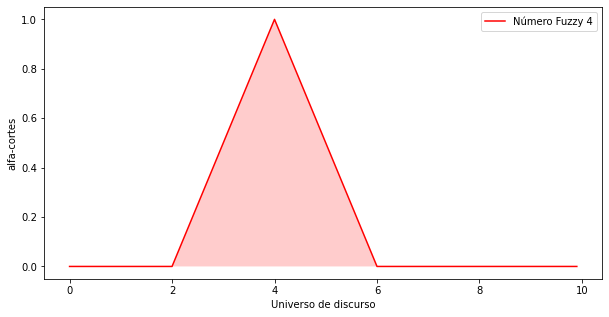

In [20]:
fig, f3_4 = plt.subplots(nrows=1, figsize=(10, 5))
f3_4.plot(X2,Trim4,'r', linewidth=1.5, label='Número Fuzzy 4')
f3_4.fill(X2,Trim4,'r', alpha=0.2)
#n4.grid()
f3_4.legend()
f3_4.set_xlabel('Universo de discurso')
f3_4.set_ylabel('alfa-cortes')
plt.show()
#fig.savefig('convexo_e_normal.png')

Definição dos intervalos para a equação de um número fuzzy triangular:

\begin{equation}
\label{eq:rep-nf3-alfa}
[a^{\alpha}_{i},a^{\alpha}_{s}] = [(m-a)\alpha + a, (m-b)\alpha + b], \forall \alpha \in [0,1]
\end{equation} 

In [21]:
# define os intervalos do triangulo
def i3(x,a,m,b,alfa):
    out = []
    o1 = []
    a1 = (m-a)*alfa+a
    b1 = (m-b)*alfa+b
    if (alfa >= 0) and (alfa <= 1):
        for i in x:
            if(i < a1):
                o1.append(0.0)
            elif(i >= a1 ) and (i <= b1):
                o1.append(alfa)
            elif(i > b1):
                o1.append(0.0)
        out = np.array(o1)
    else:
        out =[]
        print(' ops!!! 0 <= alfa <= 1 !!! ')

    return out

In [22]:
# Gerando os valores para os gráficos
t1 = i3(X2,2,4,6,0.2)
t2 = i3(X2,2,4,6,0.4)
t3 = i3(X2,2,4,6,0.6)
t4 = i3(X2,2,4,6,0.8)

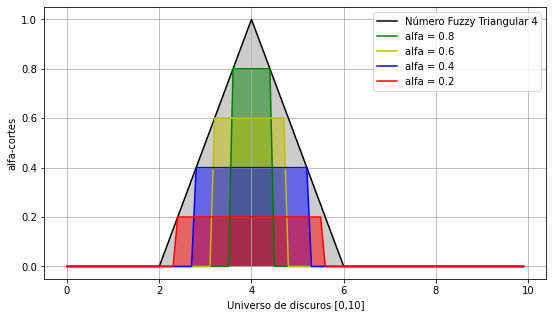

In [23]:
# grafico dos intervalos
fig, f3 = plt.subplots(nrows=1, figsize=(9, 5))
f3.plot(X2,Trim4,'k', linewidth=1.5, label='Número Fuzzy Triangular 4')
f3.fill(X2,Trim4,'k',alpha=0.2)
f3.plot(X2,t4,'g', linewidth=1.5, label='alfa = 0.8')
f3.fill(X2,t4,'g',alpha=0.5)
f3.plot(X2,t3,'y', linewidth=1.5, label='alfa = 0.6')
f3.fill(X2,t3,'y',alpha=0.5)
f3.plot(X2,t2,'b', linewidth=1.5, label='alfa = 0.4')
f3.fill(X2,t2,'b',alpha=0.5)
f3.plot(X2,t1,'r', linewidth=1.5, label='alfa = 0.2')
f3.fill(X2,t1,'r',alpha=0.5)
f3.legend()
f3.set_ylabel('alfa-cortes')
f3.set_xlabel('Universo de discuros [0,10]')
f3.grid();
#fig.savefig('num_tri_4_int.png'); # só ativar para gravar figura

## Número Fuzzy Trapezoidal - Intervalos

In [24]:
# Gerando um numero fuzzy trapezoidal
T4 = fuzzy.trapmf(X2,[1,4,6,8])
T4

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.95      , 0.9       , 0.85      , 0.8       ,
       0.75      , 0.7       , 0.65      , 0.6       , 0.55      ,
       0.5       , 0.45      , 0.4       , 0.35      , 0.3    

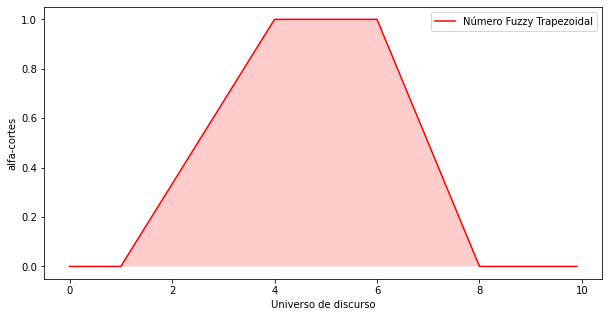

In [25]:
# grafico numero trapezoidal
fig, f4 = plt.subplots(nrows=1, figsize=(10, 5))
f4.plot(X2,T4,'r', linewidth=1.5, label='Número Fuzzy Trapezoidal')
f4.fill(X2,T4,'r', alpha=0.2)
#f4.grid()
f4.legend()
f4.set_xlabel('Universo de discurso')
f4.set_ylabel('alfa-cortes')
plt.show()
#fig.savefig('num_trap.png')

In [26]:
# define os intervalos do triangulo
def i4(x,a,m,n,b,alfa):
    out = []
    o1 = []
    a1 = (m-a)*alfa+a
    b1 = (n-b)*alfa+b
    if (alfa >= 0) and (alfa <= 1):
        for i in x:
            if(i < a1):
                o1.append(0.0)
            elif(i >= a1 ) and (i <= b1):
                o1.append(alfa)
            elif(i > b1):
                o1.append(0.0)
        out = np.array(o1)
    else:
        out =[]
        print(' ops!!! 0 <= alfa <= 1 !!! ')

    return out

In [27]:
# Gerando os valores para os gráficos
tt1 = i4(X2,1,4,6,8,0.2)
tt2 = i4(X2,1,4,6,8,0.4)
tt3 = i4(X2,1,4,6,8,0.6)
tt4 = i4(X2,1,4,6,8,0.8)

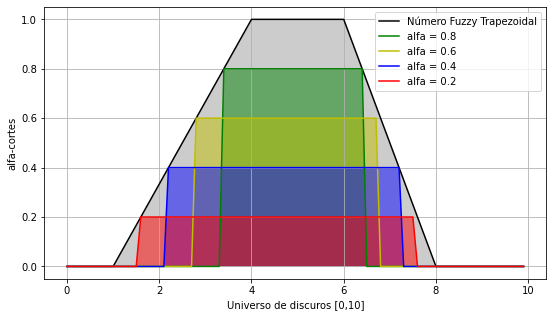

In [28]:
# grafico dos intervalos
fig, ft4 = plt.subplots(nrows=1, figsize=(9, 5))
ft4.plot(X2,T4,'k', linewidth=1.5, label='Número Fuzzy Trapezoidal')
ft4.fill(X2,T4,'k',alpha=0.2)
ft4.plot(X2,tt4,'g', linewidth=1.5, label='alfa = 0.8')
ft4.fill(X2,tt4,'g',alpha=0.5)
ft4.plot(X2,tt3,'y', linewidth=1.5, label='alfa = 0.6')
ft4.fill(X2,tt3,'y',alpha=0.5)
ft4.plot(X2,tt2,'b', linewidth=1.5, label='alfa = 0.4')
ft4.fill(X2,tt2,'b',alpha=0.5)
ft4.plot(X2,tt1,'r', linewidth=1.5, label='alfa = 0.2')
ft4.fill(X2,tt1,'r',alpha=0.5)
ft4.legend()
ft4.set_ylabel('alfa-cortes')
ft4.set_xlabel('Universo de discuros [0,10]')
ft4.grid();
#fig.savefig('num_trap_int.png'); # só ativar para gravar figura

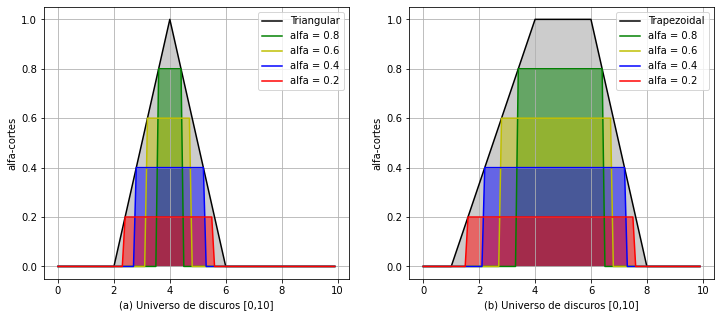

In [29]:
# unindo os dois graficos
fig, nf = plt.subplots(nrows=1, ncols = 2, figsize=(12, 5))
# grafico coluna 1
nf[0].plot(X2,Trim4,'k', linewidth=1.5, label='Triangular')
nf[0].fill(X2,Trim4,'k',alpha=0.2)
nf[0].plot(X2,t4,'g', linewidth=1.5, label='alfa = 0.8')
nf[0].fill(X2,t4,'g',alpha=0.5)
nf[0].plot(X2,t3,'y', linewidth=1.5, label='alfa = 0.6')
nf[0].fill(X2,t3,'y',alpha=0.5)
nf[0].plot(X2,t2,'b', linewidth=1.5, label='alfa = 0.4')
nf[0].fill(X2,t2,'b',alpha=0.5)
nf[0].plot(X2,t1,'r', linewidth=1.5, label='alfa = 0.2')
nf[0].fill(X2,t1,'r',alpha=0.5)
nf[0].legend()
nf[0].set_ylabel('alfa-cortes')
nf[0].set_xlabel('(a) Universo de discuros [0,10]')
nf[0].grid()
# grafico coluna 2
nf[1].plot(X2,T4,'k', linewidth=1.5, label='Trapezoidal')
nf[1].fill(X2,T4,'k',alpha=0.2)
nf[1].plot(X2,tt4,'g', linewidth=1.5, label='alfa = 0.8')
nf[1].fill(X2,tt4,'g',alpha=0.5)
nf[1].plot(X2,tt3,'y', linewidth=1.5, label='alfa = 0.6')
nf[1].fill(X2,tt3,'y',alpha=0.5)
nf[1].plot(X2,tt2,'b', linewidth=1.5, label='alfa = 0.4')
nf[1].fill(X2,tt2,'b',alpha=0.5)
nf[1].plot(X2,tt1,'r', linewidth=1.5, label='alfa = 0.2')
nf[1].fill(X2,tt1,'r',alpha=0.5)
nf[1].legend()
nf[1].set_ylabel('alfa-cortes')
nf[1].set_xlabel('(b) Universo de discuros [0,10]')
nf[1].grid();
#fig.savefig('num_fuz_int.png'); # só ativar para gravar figura

---
#### Copyright © Jorge Zavaleta, 2023